# Detecting Human Activities Through Smartphone Sensor 

- Data set source:  WISDM Lab of Frodham University, NY
https://archive.ics.uci.edu/dataset/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset

Data captured using

- Two kinds of devices:
    - Smartphone (Samsung Galaxy S5)
    - Smartwatch (LG G)

    
- Two kinds of embedded kinematic sensors (for each device):
    - Accelerometer - for measurement of linear acceleration (m/sec^2)
    - Gyroscope - for measurement of angular velocity (rad/sec)



Reference coordinate system definition:
---

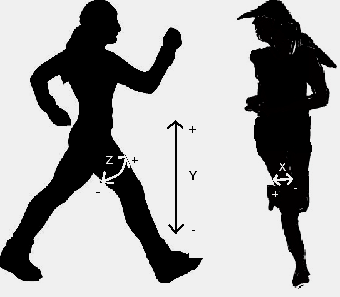


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
from tqdm import tqdm
import filecmp

PBAR_FORMAT='{desc:12}{percentage:3.0f}%|{bar:27}[ {n:4d}/{total:4d}, {elapsed}<{remaining}{postfix} ]'

Each activity is represented as an alphabet in the dataset. To make meaningful inference of data we map it to actual activity

In [2]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

# Dataset understanding

## Phone Accelerometer

- Load the phone accelerometer sensor data for participant 1

In [7]:
df_pa_p01 = pd.read_csv(r'../dataset/raw/phone/accel/data_1601_accel_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
print(df_pa_p01.info())
df_pa_p01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81457 entries, 0 to 81456
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  81457 non-null  int64  
 1   activity_code   81457 non-null  object 
 2   timestamp       81457 non-null  int64  
 3   x               81457 non-null  float64
 4   y               81457 non-null  float64
 5   z               81457 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.7+ MB
None


,participant_id,activity_code,timestamp,x,y,z
0,1601,A,265073308304101,4.703409,9.127296,0.06404489;
1,1601,A,265073348330612,5.354632,15.635334,-0.6290765;
2,1601,A,265073388368581,6.399701,12.926893,0.45010993;
3,1601,A,265073428111445,10.532093,13.207614,-1.0247183;
4,1601,A,265073468081082,16.129736,2.683301,1.1426327;


    - Observation
        - Most of the data are numeric except for z column

- Load the phone accelerometer sensor data for participant 2

In [9]:
df_pa_p02 = pd.read_csv(r'../dataset/raw/phone/accel/data_1602_accel_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
print(df_pa_p02.info())
df_pa_p02.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81457 entries, 0 to 81456
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  81457 non-null  int64  
 1   activity_code   81457 non-null  object 
 2   timestamp       81457 non-null  int64  
 3   x               81457 non-null  float64
 4   y               81457 non-null  float64
 5   z               81457 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.7+ MB
None


,participant_id,activity_code,timestamp,x,y,z
0,1601,A,265073308304101,4.703409,9.127296,0.06404489;
1,1601,A,265073348330612,5.354632,15.635334,-0.6290765;
2,1601,A,265073388368581,6.399701,12.926893,0.45010993;
3,1601,A,265073428111445,10.532093,13.207614,-1.0247183;
4,1601,A,265073468081082,16.129736,2.683301,1.1426327;


    - Observation
        - Similar pattern seen as participant 1

- Lets confirm is the remaining participants data is also similar dtype 

In [20]:
for file_name in tqdm(glob.glob(r'../dataset/raw/phone/accel/data_*_accel_phone.txt'),
                      desc="Checking",
                     bar_format=PBAR_FORMAT):
    df_pa = pd.read_csv(file_name, names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
    if (df_pa.dtypes != df_pa_p01.dtypes).any():
        print(f"mismatch in df for file {file_name}")

Checking    100%|███████████████████████████[   51/  51, 00:03<00:00 ]


    - Observation:
          - All data csv's have no missing values

- Check for missing values in csv files

In [21]:
for file_name in tqdm(glob.glob(r'../dataset/raw/phone/accel/data_*_accel_phone.txt'),
                      desc="Checking",
                     bar_format=PBAR_FORMAT):
    df_pa = pd.read_csv(file_name, names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
    if (df_pa.notnull().any().any() == False):
        print("missing value present")

Checking    100%|███████████████████████████[   51/  51, 00:03<00:00 ]


   - Observation:
          - All data csv's have no missing values

## Phone Gyroscope

In [23]:
df_pg_p01 = pd.read_csv(r'../dataset/raw/phone/gyro/data_1601_gyro_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
print(df_pg_p01.info())
df_pg_p01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81193 entries, 0 to 81192
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  81193 non-null  int64  
 1   activity_code   81193 non-null  object 
 2   timestamp       81193 non-null  int64  
 3   x               81193 non-null  float64
 4   y               81193 non-null  float64
 5   z               81193 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.7+ MB
None


,participant_id,activity_code,timestamp,x,y,z
0,1601,A,265073308304101,-0.020240,-0.004261,-0.023435818;
1,1601,A,265073348330612,-1.213602,0.055394,-0.36964676;
2,1601,A,265073388368581,-2.417352,1.124387,-1.644502;
3,1601,A,265073428111445,-3.075152,1.530252,-1.6729978;
4,1601,A,265073468081082,0.011185,4.576909,-0.24367924;


    - Observation
        - Most of the data are numeric except for z column

- Load the watch gyro sensor data for participant 2

In [27]:
df_pg_p02 = pd.read_csv(r'../dataset/raw/phone/gyro/data_1602_gyro_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
print(df_pg_p02.info())
df_pg_p02.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64286 entries, 0 to 64285
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  64286 non-null  int64  
 1   activity_code   64286 non-null  object 
 2   timestamp       64286 non-null  int64  
 3   x               64286 non-null  float64
 4   y               64286 non-null  float64
 5   z               64286 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.9+ MB
None


,participant_id,activity_code,timestamp,x,y,z
0,1602,A,99019678643841,-0.719742,0.398651,-0.16711426;
1,1602,A,99019728997845,-0.957825,1.615234,-0.111709595;
2,1602,A,99019779351849,-1.881058,1.473206,0.83522034;
3,1602,A,99019829705853,-1.575790,0.241714,0.34750366;
4,1602,A,99019880059857,-1.639481,1.097153,0.34846497;


    - Observation
        - Similar pattern seen as participant 1

- Lets confirm is the remaining participants data is also similar dtype 

In [28]:
for file_name in tqdm(glob.glob(r'../dataset/raw/phone/gyro/data_*_gyro_phone.txt'),
                      desc="Checking",
                     bar_format=PBAR_FORMAT):
    df_pg = pd.read_csv(file_name, names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
    if (df_pg.dtypes != df_pg_p01.dtypes).any():
        print(f"mismatch in df for file {file_name}")

Checking    100%|███████████████████████████[   51/  51, 00:02<00:00 ]


    - Observation:
          - All data csv's have same data type as that of participant 1

- Check for missing values in csv files

In [30]:
for file_name in tqdm(glob.glob(r'../dataset/raw/watch/gyro/data_*_gyro_watch.txt'),
                      desc="Checking",
                     bar_format=PBAR_FORMAT):
    df_pg = pd.read_csv(file_name, names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
    if (df_pg.notnull().any().any() == False):
        print("missing value present")

Checking    100%|███████████████████████████[   51/  51, 00:03<00:00 ]


    - Observation:
          - All data csv's have no missing values